# State of Data 2021

## Diferenças de gênero na área de Ciência de Dados

#### Diversidade na área de TI

A diversidade e inclusão no setor de TI, apesar do destaque crescente em estudos e políticas empresariais, ainda tem muito a desenvoler. Um ambiente de trabalho diverso é composto por pessoas de diferentes gêneros, etnias, formações, idades e vivências, capazes de compor uma visão mais complexa de determinada questão, por somarem diferentes pontos de vista. 

A TI por sua vez, é um póli inovador para o negócio e trazer esta diversidade representante da sociedade para dentro da TI torna o setor mais bem preparado para lidar com todo tipo de desafio ou demanda. Uma equipe mais diversa ainda estará melhor preparada para lidar com os anseios e desejos dos clientes que, por sua vez, também são plurais. Equipes mais diversas também auxiliam no desenvolvimento de soft skills como colaboração e comunicação não-violenta.

Equipes mais diversas são reflexo do que vivemos em sociedade, desse modo, ter vivências diferentes em um único espaço contribui para o desenvolvimento da equipe. Em times menos tradicionais, surgem:

- ideias mais coesas;
- profissionais mais conectados com as dores dos seus clientes
- comunicação com um público mais diverso;
- maiores aprendizados devido a pluralidade.

Devido ao contexto histórico no setor de TI, temos o desenvolvimento de ideias inconscientes que excluem grupos minoritários. Mulheres ainda não são tão representadas, principalmente em cargos de liderança. O problema também se estende para outros grupos minoritários como negros e pessoas LGBTQIA+. Pessoas negras ainda são mais impactadas pelo contexto sócio-econômico, onde muitos não tem acesso à educação de qualidade e empregos melhores.

Uma pesquisa realizada pela KPMG, em 2019, indicou que, no Brasil, apenas uma a cada cinco profissionais de TI é mulher. Já quando consideramos etnia, apesar da falta de pesquisas nacionais sobre profissionais negros na área, uma pesquisa da Atlassian indicou que apenas 5% dos postos de emprego na indústria da tecnologia eram ocupados por pessoas negras.

Ou seja, o investimento em diversidade e inclusão na TI é necessário, primeiramente, para criar equipes plurais, que refletem a população, compreendem suas dores e, assim, são capazes de criar melhores soluções. Em segundo lugar, a diversidade na TI é o reflexo de valores corporativos voltados para a redução de preconceitos e desigualdades sociais, raciais, de gênero e outras tão presentes em nossa sociedade.


- Referências:
    - https://www.microcity.com.br/diversidade-na-ti/
    - https://www.tqi.com.br/diversidade-e-inclusao-no-setor-de-ti/

In [94]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [95]:
df = pd.read_csv('state_of_data_tradado.csv')
print(df.shape)
df.head()

(2645, 44)


,id,Idade,Faixa idade,Genero,Regiao onde mora,Regiao de origem,Mudou de Estado?,Nivel de Ensino,Área de Formação,Qual sua situação atual de trabalho?,...,Flexibilidade de trabalho remoto,Ambiente e clima de trabalho,Oportunidade de aprendizado e trabalhar com referências na área,Plano de carreira e oportunidades de crescimento profissional,Maturidade da empresa em termos de tecnologia e dados,Qualidade dos gestores e líderes,Reputação que a empresa tem no mercado,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?
0,qkx4q0ei90wcjxnqkx4q0j3xgf0zn13s,38.0,35-39,Masculino,Nordeste,Sudeste,0,Pós-graduação,Química / Física,Empregado (CLT),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial.
1,zdl2n19yhgpnoaco6kkczdl2nwv9zwrt,39.0,35-39,Masculino,Nordeste,Sudeste,1,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Empreendedor ou Empregado (CNPJ),...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Modelo híbrido flexível (o funcionário tem lib...,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...
2,vsamqp2un3q7us84mgvsams5fulsmcoh,30.0,30-34,Masculino,Sul,Sul,0,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo 100% remoto,Vou procurar outra oportunidade no modelo híbr...
3,v31ab41botodnsv31zgg4k34zzojy81l,38.0,35-39,Feminino,Sudeste,Sul,0,Pós-graduação,Outras,Empreendedor ou Empregado (CNPJ),...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou procurar outra oportunidade no modelo híbr...
4,ubhu8ntvm4xc0sfkdubhu80e973eek0k,36.0,35-39,Masculino,Sul,Sul,0,Pós-graduação,Outras Engenharias,Empreendedor ou Empregado (CNPJ),...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Modelo 100% presencial,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...


In [96]:
# Configurações de paleta, próprio para adaptar um modelo do Seaborn a todas as bibliotecas utilizadas.
# Use a variável para configurar as cores do gráfico.
# Para trocar a paleta, basta escolher um novo conjunto de cores e substituir a string.

color_pal = sns.color_palette("Pastel2")
color_pal = color_pal.as_hex()

# Feminino: color_pal[1], Masculino: color_pal[0]
sns.set_theme(style='white', palette='Pastel2')
color_pal

['#b3e2cd',
 '#fdcdac',
 '#cbd5e8',
 '#f4cae4',
 '#e6f5c9',
 '#fff2ae',
 '#f1e2cc',
 '#cccccc']

- Proporção de gênero dentre os respondentes

In [97]:
df['Genero'].value_counts()

Masculino    2144
Feminino      493
Outro           8
Name: Genero, dtype: int64

In [98]:
df = df[df['Genero']!='Outro']
df['Genero'].value_counts(normalize=True)

Masculino    0.813045
Feminino     0.186955
Name: Genero, dtype: float64

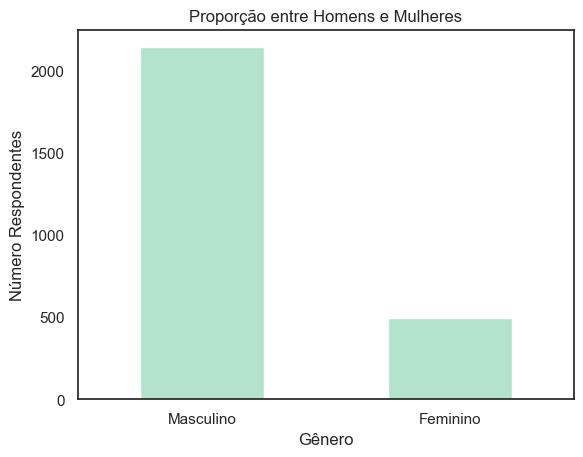

In [99]:
# Fazer gráfico com valor normalizado ou não?
# Ajustar cores das barras pra padronizar mulheres sempre como laranja e homens sempre como azul
# (ou definir outras cores)
df['Genero'].value_counts().plot(kind='bar',
                                 ylabel='Número Respondentes',
                                 xlabel='Gênero',
                                 title='Proporção entre Homens e Mulheres',
                                 rot=0)
plt.show()

- 81,06% dos respondentes se identificaram como homens
- 18,64% como mulheres
- 0,30% como 'outros'

A diferença entre homens e mulheres na pesquisa é alta e muito diferente da proporção geral da população, em torno de 50% pra cada gênero. Essa diferença pode se dever a um viés de coleta dos dados, já mencionado anteriormente.
Apesar disso, mesmo tendo algum viés de amostragem, é possivelmente representativo da área de Ciência de Dados. Áreas de TI possuem uma disparidade de gêneros, com alta concentração masculina no mercado de trabalho.

- Genero "Outros" foi filtrado dos gráficos de histograma e boxplot devido a baixa amostragem.

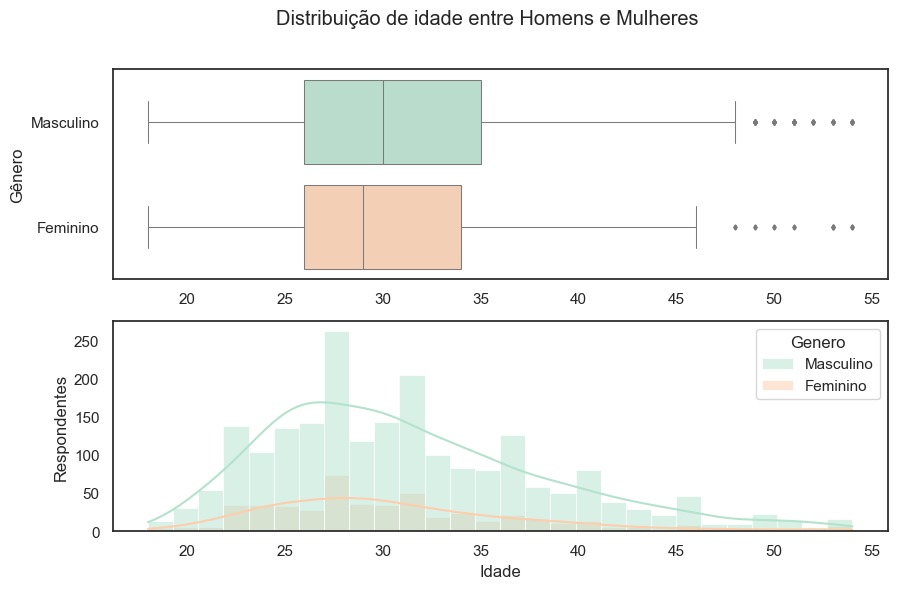

In [100]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(10,6))

plt.subplot(2,1,1)
sns.boxplot(df,
            x='Idade', y='Genero',
            linewidth = 0.75,
            fliersize=2.5)
plt.xlabel('')
plt.ylabel('Gênero')

plt.subplot(2,1,2)
sns.histplot(df,
             x="Idade",
             hue="Genero",
             kde=True,
             linewidth = 0.5,
             )
plt.ylabel('Respondentes')

plt.suptitle('Distribuição de idade entre Homens e Mulheres')
plt.show()


In [101]:
df['Idade'].describe()

count    2637.000000
mean       31.159651
std         7.095057
min        18.000000
25%        26.000000
50%        30.000000
75%        35.000000
max        54.000000
Name: Idade, dtype: float64

Variação de idade entre homens e mulheres, apesar da diferença na proporção dos gêneros, mostra uma tendência semelhante, e provavelmente não há diferenças significativas estatisticamente.

Os dois gêneros apresentam maior representatividade nas faixas etárias mais novas, tendo o intervalo interquartil entre 26 e 35 anos e média de 31,14 anos.

- Região onde mora

In [102]:
df['Regiao onde mora'].value_counts(normalize=True)

Sudeste         0.632537
Sul             0.150929
Nordeste        0.113766
Centro-oeste    0.069397
Exterior        0.019719
Norte           0.013652
Name: Regiao onde mora, dtype: float64

<Axes: xlabel='Regiao onde mora', ylabel='count'>

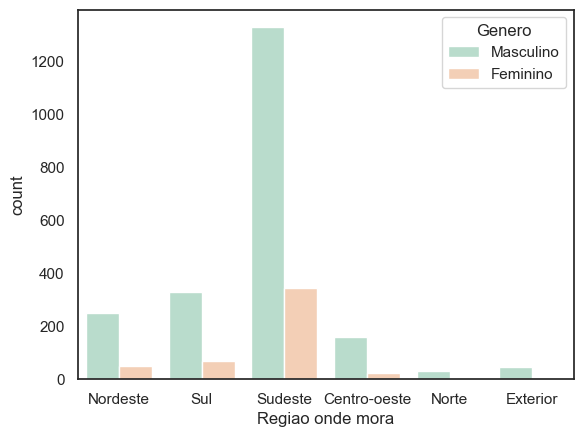

In [103]:
sns.countplot(df, x="Regiao onde mora", hue="Genero")

A maior concentração de respondentes mora no Sudeste (63,18%), seguida pelas regiões Sul e Nordeste (15,12% e 11,38% respectivamente). A região Centro-Oeste possui 6,96% dos residentes. A região Norte ficou atrás até mesmo dos residentes no exterior (Norte: 1,36%, exterior: 2,00%)
Vários fatores podem contribuir pra esse acúmulo de moradores da região Sudeste. Uma maior concentração de empresas e sede de empresas nessa região, bem como uma maior concentração populacional nessa região comparado com as demais.
Seria interessante como análise futura, fazer uma comparação com a proporção das populações entre diferentes regiões do Brasil. Isso provavelmente deve evidenciar uma subrepresentação de várias regiões na amostragem e superrepresentação da região Sudeste.

Quanto a diferença entre gêneros, não é possível verificar uma diferença clara entre os 2 gêneros, ambos seguindo um padrão semelhante.

- Salário

<Axes: xlabel='count', ylabel='Faixa salarial'>

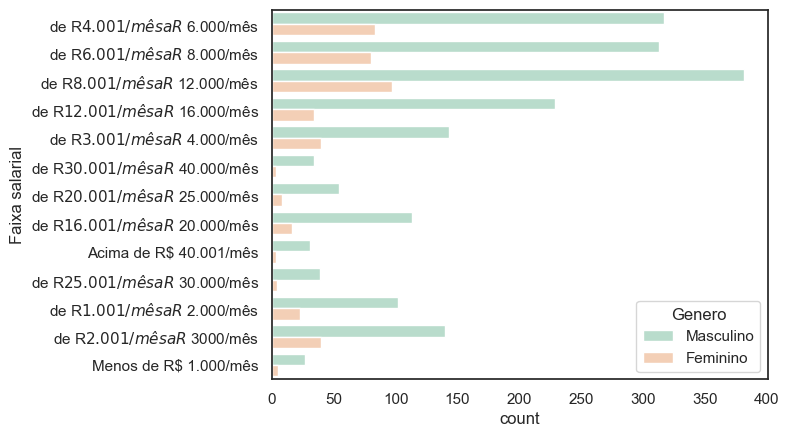

In [104]:
sns.countplot(df, y="Faixa salarial", hue="Genero")

## Escolaridade entre homens e mulheres

### Nível geral de escolaridade

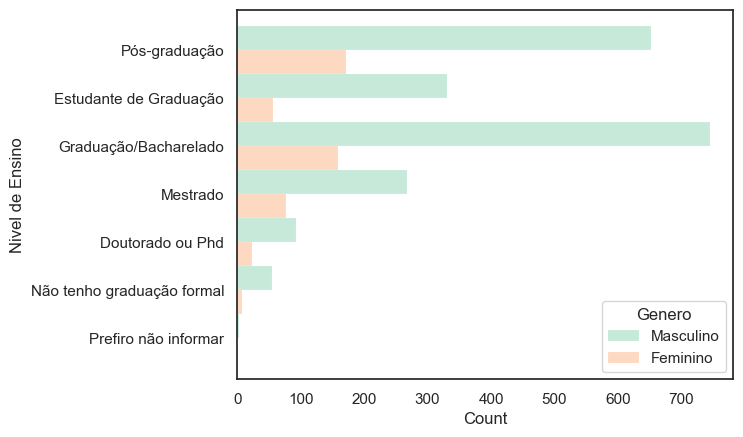

In [105]:
# Histograma Escolaridade
g = sns.histplot(df,
             y="Nivel de Ensino", hue="Genero",
             multiple="dodge",
             linewidth = 0.1)
sns.move_legend(g, "lower right")

## Índice de Empregados x Desempregados entre entrevistados

### Histograma comparativo de empregados x desempregados com a situação especificada

<Axes: xlabel='Count', ylabel='Qual sua situação atual de trabalho?'>

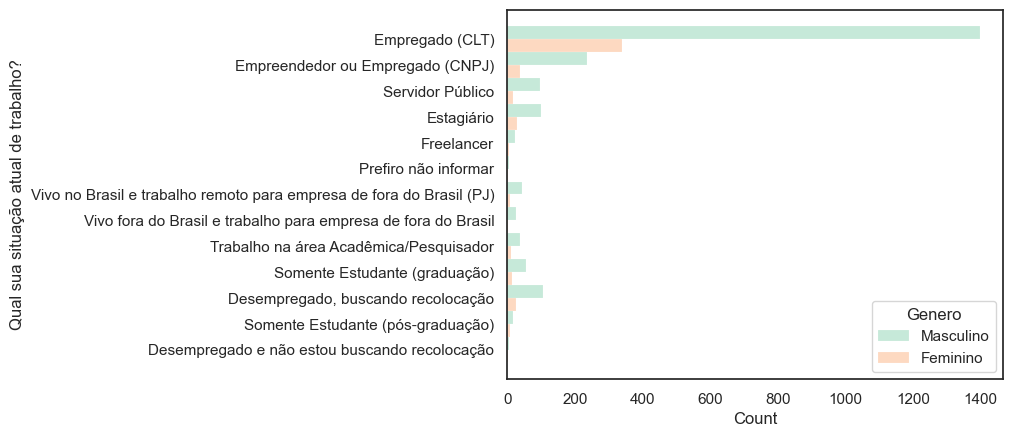

In [106]:
# Histograma comparativo de empregados x desempregados com funções discriminadas 
sns.histplot(df,
             y="Qual sua situação atual de trabalho?", hue="Genero",
             multiple="dodge",
             linewidth = 0.1)

### Histograma comparativo de empregados x desempregados com a situação generalizada

<Axes: xlabel='Count', ylabel='Situação'>

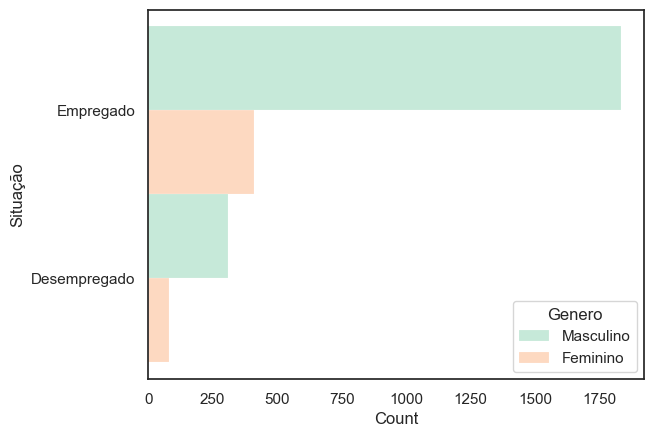

In [107]:
# Histograma comparativo de empregados x desempregados com funções geral 

empregado = ['Empregado (CLT)','Empreendedor ou Empregado (CNPJ)','Servidor Público',
 'Vivo no Brasil e trabalho remoto para empresa de fora do Brasil (PJ)',
 'Vivo fora do Brasil e trabalho para empresa de fora do Brasil',
 'Trabalho na área Acadêmica/Pesquisador']

def verifica_valor(valor):
    if valor in empregado:
        return 'Empregado'
    else:
        return 'Desempregado'
    
# Aplicar a função para criar a nova coluna 'Situação'

df['Situação'] = df['Qual sua situação atual de trabalho?'].apply(verifica_valor)

# Histograma EmpregadosxDesempregados geral
sns.histplot(df,
             y="Situação", hue="Genero",
             multiple="dodge",
             linewidth = 0.1)

## Ocupação de cargos entre homens e mulheres

### Cargos operacionais

<Axes: xlabel='Count', ylabel='Cargo Atual'>

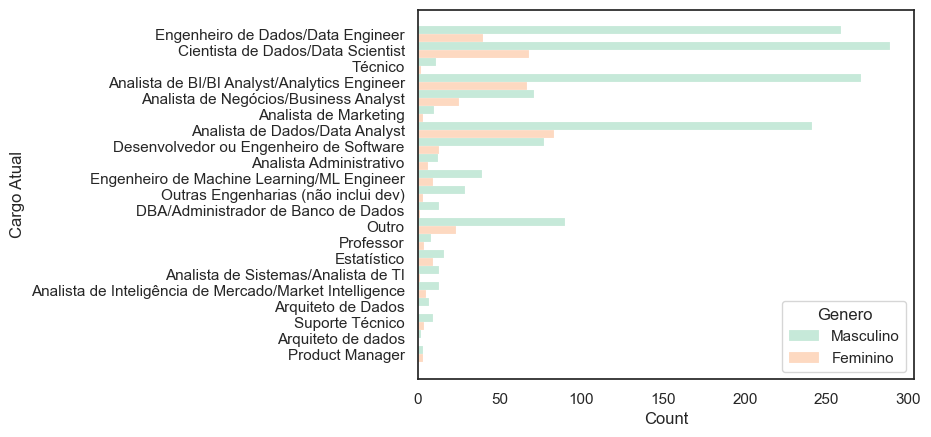

In [108]:
# Histograma de ocupação de cargos operacionais
df_cargos = df.loc[df['Cargo Atual']!='NdA']
sns.histplot(df_cargos,
             y="Cargo Atual", hue="Genero",
             multiple="dodge",
             linewidth = 0.1)

### Cargos de gestão 

<Axes: xlabel='Count', ylabel='Cargo como Gestor'>

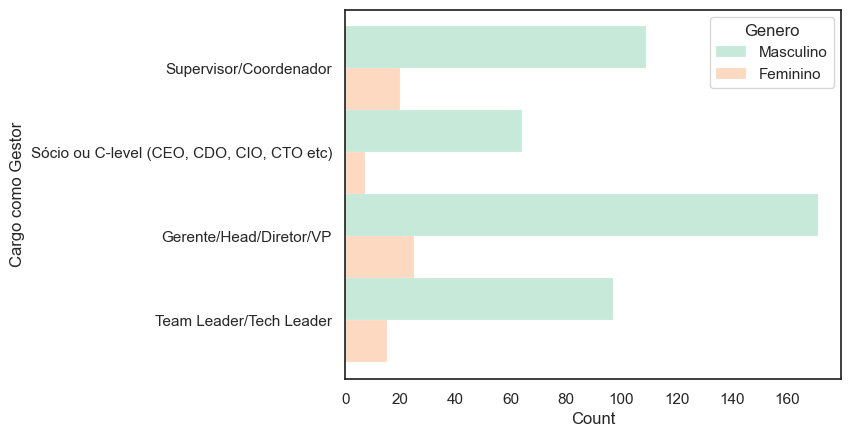

In [109]:
# Histograma de ocupação de cargos de gestão
df_gestor = df.loc[df['Cargo como Gestor']!='NdA']
sns.histplot(df_gestor,
             y="Cargo como Gestor", hue="Genero",
             multiple="dodge",
             linewidth = 0.1)

## Insatisfação com a empresa onde trabalha atualmente.

### Nível geral de insatisfação

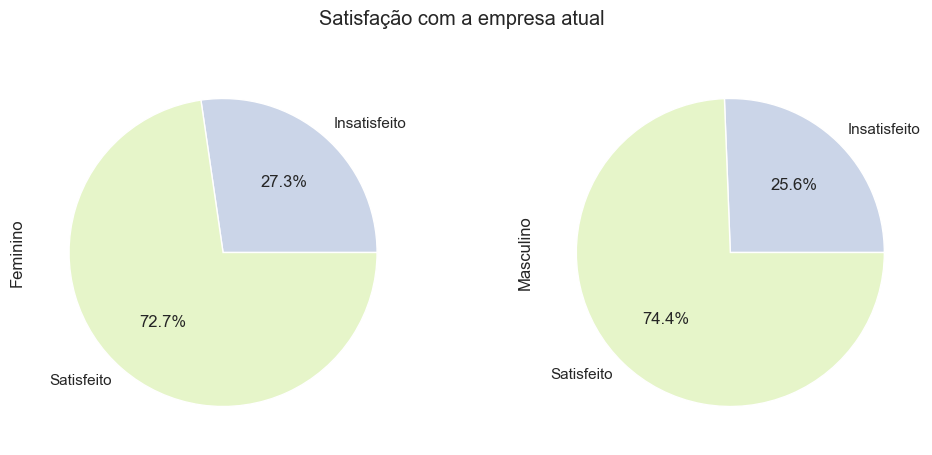

In [110]:
# Visualização utilizando o Pandas

data = df[[
    'Genero','Você está satisfeito na sua empresa atual?'
    ]].value_counts().reset_index().pivot_table(
                                                index='Você está satisfeito na sua empresa atual?', 
                                                values='Você está satisfeito na sua empresa atual?', 
                                                columns='Genero'
                                                )

data.plot(kind='pie', 
          subplots=True, 
          figsize=(12, 5),
          title='Satisfação com a empresa atual', 
          autopct='%1.1f%%', 
          labels=['Insatisfeito', 'Satisfeito'],
          legend=False,
          colors=[color_pal[2], color_pal[4]],
          )

plt.show()

Percebemos que, proporcionalmente, não há grande diferença entre gêneros referente à quantidade de pessoas insatisfeitas com seus trabalhos.

### Principais motivos de insatisfação.

Valores proporcionais para cada alternativa calculados usando a quantidade de insatisfeitos por gênero.

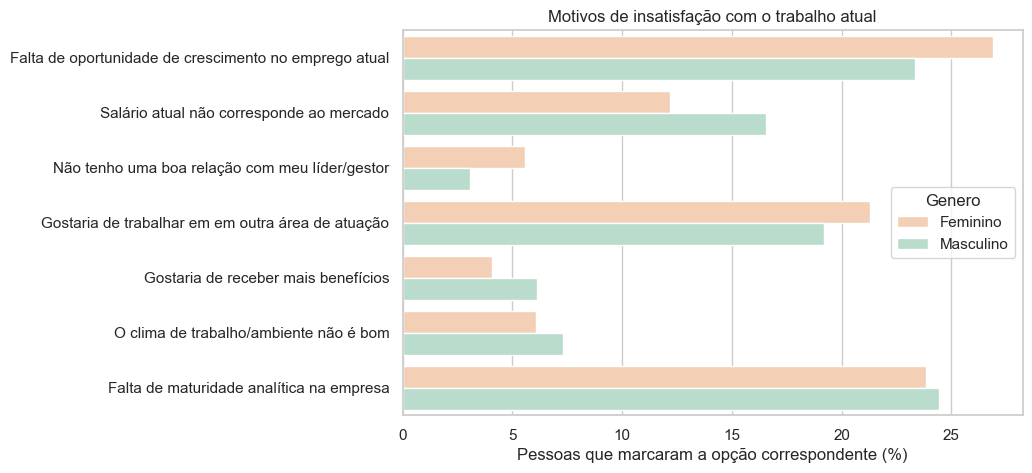

In [111]:
# Visualização utilizando o Seaborn
columns = ['Genero','Falta de oportunidade de crescimento no emprego atual',
 'Salário atual não corresponde ao mercado',
 'Não tenho uma boa relação com meu líder/gestor',
 'Gostaria de trabalhar em em outra área de atuação',
 'Gostaria de receber mais benefícios',
 'O clima de trabalho/ambiente não é bom',
 'Falta de maturidade analítica na empresa']

insatisfeitos = df.loc[df['Você está satisfeito na sua empresa atual?']==0]

df_motivos = insatisfeitos[columns].replace(-1.0, 0.0)
df_motivos= df_motivos.groupby('Genero').sum().apply(lambda x: (x/x.sum())*100, axis=1)
df_melted = df_motivos.reset_index().melt(id_vars='Genero', var_name='Motivo', value_name='Value')

sns.set_theme(style='whitegrid')

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(df_melted, 
            y='Motivo', 
            x='Value', 
            hue='Genero', 
            orient='h', 
            palette=[color_pal[1], color_pal[0]],
            width=0.8,
            )

plt.title('Motivos de insatisfação com o trabalho atual')
ax.set_ylabel('')
ax.set_xlabel('Pessoas que marcaram a opção correspondente (%)')

plt.show()

Podemos observar que entre os entrevistados que se identificaram como o gênero masculino, há maior predominância de insatisfação com o salário atual, enquanto que no gênero feminino há maior preocupação com as oportunidades de crescimento e relação com o gestor.
Como vimos anteriormente, a quantidade de pessoas do gênero feminino em cargos de gestão é bem menor, o que pode influenciar tanto na perspectiva de crescimento da funcionária quanto na relação com o líder.

### Insatisfação x idade

In [112]:
# Visualização utilizando o Plotly
insatisfeitos = df.loc[df['Você está satisfeito na sua empresa atual?']==0, ['Genero', 'Idade']]
insatisfeitos

fig = px.violin(insatisfeitos, y="Idade", 
                color="Genero", 
                color_discrete_sequence=color_pal, 
                template = 'plotly_white'
                )

fig.update_layout(width=900, height=500, 
                  title_text="Distribuição de idade dos insatisfeitos com o trabalho atual",
                  title_x=0.50
                  )

fig.show()


Aparentemente não é possível observar grandes diferenças entre a evolução da insatisfação de acordo com a idade, apenas uma concentração maior na faixa dos 40-50 anos para o gênero feminino.

### Insatisfação x tempo de trabalho

Valores proporcionais para cada faixa de tempo de trabalho, calculados utilizando as informações relativas a participantes insatisfeitos.

In [113]:
# Visualização utilizando o Plotly

insatisfeitos = df.loc[df['Você está satisfeito na sua empresa atual?']==0, 
                       ['Genero', 'Quanto tempo de experiência na área de dados você tem?']]
df_percent = insatisfeitos.groupby('Genero')[
                'Quanto tempo de experiência na área de dados você tem?'
                ].value_counts().unstack().apply(lambda x: (x/x.sum())*100, axis=1).reset_index()

df_percent = df_percent.melt(id_vars='Genero', 
                var_name='Expêriencia', 
                value_name='Value').replace(
                    'Não tenho experiência na área de dados', 
                    'Sem experiência'
                    )
                
fig = px.bar(df_percent,
                barmode='group', 
                x = 'Expêriencia',
                y = 'Value',
                color='Genero',
                template='simple_white',
                category_orders={
                                    'Expêriencia': [
                                        'Sem experiência',
                                        'Menos de 1 ano',
                                        'de 1 a 2 anos',
                                        'de 2 a 3 anos',
                                        'de 4 a 5 anos',
                                        'de 6 a 10 anos',
                                        'Mais de 10 anos',
                                        ]
                                    },
       color_discrete_sequence=[color_pal[1], color_pal[0]],
       labels={'Expêriencia': 'Tempo de experiência', 
               'Value': 'Quantidade (%)'
               },
       )

fig.update_layout(width=950, height=500, 
                  title_text='Tempo de experiência dos insatisfeitos com o trabalho atual',
                  title_x=0.50
                  )

fig.show()                

É possível observar que há uma maior concentração de insatisfação nos primeiros anos de carreira para ambos os gêneros, com uma diferença mais acentuada na fase inicial.

In [114]:
# Visualização utilizando o Plotly

insatisfeitos = df.loc[df['Você está satisfeito na sua empresa atual?']==0, 
                       ['Genero', 'Quanto tempo de experiência na área de dados você tem?', 'Idade']]

fig = px.box(insatisfeitos, 
       x = 'Quanto tempo de experiência na área de dados você tem?', 
       y = 'Idade',
       color='Genero',
       template='simple_white',
       category_orders={
                        'Quanto tempo de experiência na área de dados você tem?': [
                            'Não tenho experiência na área de dados',
                            'Menos de 1 ano',
                            'de 1 a 2 anos',
                            'de 2 a 3 anos',
                            'de 4 a 5 anos',
                            'de 6 a 10 anos',
                            'Mais de 10 anos',
                            ]
                        },
       labels = {'Quanto tempo de experiência na área de dados você tem?': 'Tempo de experiência'},
       color_discrete_sequence=color_pal,
       )

fig.update_layout(width=950, height=500, 
                  title_text='Relação entre idade e tempo de experiência dos insatisfeitos com o trabalho atual',
                  title_x=0.50
                  )

fig.show()

### Insatisfação x modalidade de trabalho

In [115]:
df_insatisfacao = df.loc[df['Você está satisfeito na sua empresa atual?']>=0, 
                       [
                        'Genero', 
                        'Você está satisfeito na sua empresa atual?', 
                        'Atualmente qual a sua forma de trabalho?'
                        ]]

# Substituindo valores para melhor visualização
df_insatisfacao['Você está satisfeito na sua empresa atual?'
                ].replace(0, 'Insatisfeito', inplace=True)

df_insatisfacao['Você está satisfeito na sua empresa atual?'
                ].replace(1, 'Satisfeito', inplace=True)

df_insatisfacao['Atualmente qual a sua forma de trabalho?'].replace(
        'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)',
        'Modelo híbrido flexível', inplace=True)

df_insatisfacao['Atualmente qual a sua forma de trabalho?'].replace(
        'Modelo híbrido com dias fixos de trabalho presencial',
        'Modelo híbrido fixo', inplace=True)


# Separando por gênero e reorganizando para plotagem
data_f = df_insatisfacao.loc[df_insatisfacao['Genero']=='Feminino'].groupby('Atualmente qual a sua forma de trabalho?'
                            )['Você está satisfeito na sua empresa atual?'].value_counts(normalize=True).unstack()
data_f['Genero'] = 'Feminino'

data_m = df_insatisfacao.loc[df_insatisfacao['Genero']=='Masculino'].groupby('Atualmente qual a sua forma de trabalho?'
                            )['Você está satisfeito na sua empresa atual?'].value_counts(normalize=True).unstack()   
data_m['Genero'] = 'Masculino'

concat = pd.concat([data_f, data_m], axis=0)

fig = px.bar(
            concat, 
            barmode='stack', 
            color_discrete_sequence=[color_pal[2], color_pal[4]], 
            orientation='h',
            facet_row='Genero',
            labels={'Atualmente qual a sua forma de trabalho?': '',
                    'Você está satisfeito na sua empresa atual?': ''}
            )


fig.update_layout(width=950, height=600,
                  title_text='Modelo de trabalho x insatisfação',
                  title_x=0.50,
                  showlegend=True,
                  plot_bgcolor='white',
                  xaxis_visible=False, 
                  xaxis_showticklabels=False
                  )


fig.show()

Vemos que há uma maior concentração de insatisfação nos funcionários que atualmente seguem o modelo de trabalho 100% presencial para ambos os gêneros estudados.

## Forma de trabalho ideal

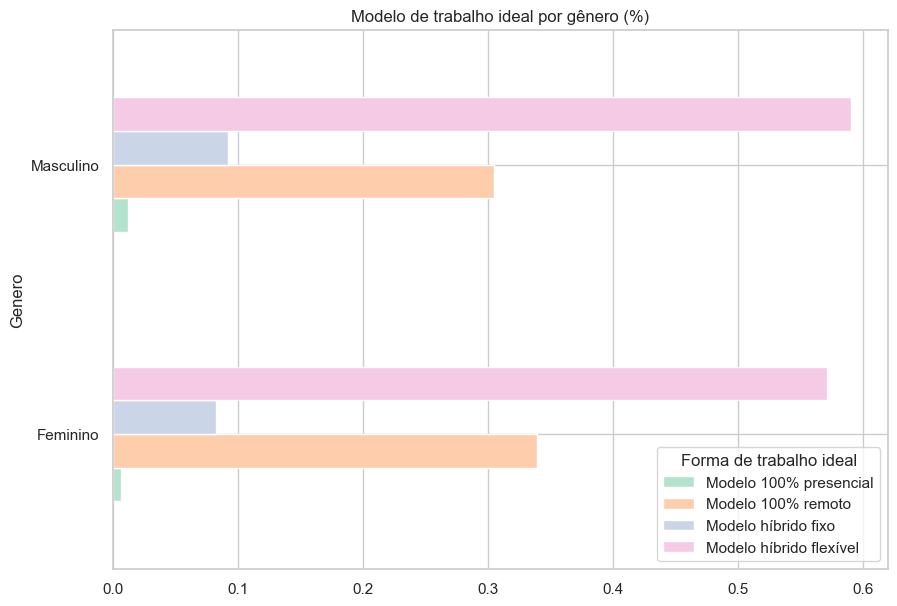

In [116]:
df_trabalho = df.groupby('Genero')['Qual a forma de trabalho ideal para você?'].value_counts(normalize=True).unstack()

df_trabalho.pivot_table(columns='Genero')
df_trabalho.rename(columns={'Modelo híbrido com dias fixos de trabalho presencial':'Modelo híbrido fixo',
                    'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)':
                    'Modelo híbrido flexível'
                    }, inplace=True)

fig = df_trabalho.plot(kind='barh', figsize=(10, 7), color=color_pal)
fig.title.set_text('Modelo de trabalho ideal por gênero (%)')
plt.legend(loc='lower right', title='Forma de trabalho ideal')

plt.draw()

Entre todos os entrevistados há uma preferência predominante pelo modelo híbrido flexível, seguida do 100% remoto. No caso do gênero feminino, a rejeição do modelo presencial e preferência pelo 100% remoto são ainda maiores.